In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import pickle
import torch
import os
from rdkit import Chem
from rdkit.Geometry import Point3D

In [6]:
from utils_eval import build_pdb_dict, center2zero, pp_match
from pp_matching_specific_site import compute_center

In [18]:
# ligand_name = '1ywn_A_rec_1ywn_lif_lig_tt_docked_0'
# ligand_name = '4b81_B_rec_4ara_c56_lig_tt_min_0'
# ligand_name = '1lhu_A_rec_1lhn_aon_lig_tt_min_0'
# ligand_name = '4b84_A_rec_4b84_z5k_lig_tt_min_0'
# ligand_name = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0'
# ligand_name = '5hbh_A_rec_5idn_6a7_lig_tt_min_0'
# ligand_name = '5aen_A_rec_5ni2_dj3_lig_tt_min_0'
# ligand_name = '3d3e_B_rec_4ijw_1eq_lig_tt_min_0'
# ligand_name = '4yyz_B_rec_3ey4_352_lig_tt_docked_12'
# ligand_name = '4h7c_A_rec_3r58_nps_lig_tt_min_0'
# ligand_name = '3ey4_C_rec_4k1l_sff_lig_tt_min_0'

# ligand_name = '3hfg_A_rec_3hfg_17r_lig_tt_min_0'
# ligand_name = '3ey4_C_rec_5pgu_8k4_lig_tt_min_0'  # 0.11 0.10
# ligand_name = '5ni2_A_rec_5aen_dp8_lig_tt_min_0'
# ligand_name = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0'
# ligand_name = '4yyz_B_rec_2ilt_nn1_lig_tt_min_0'  # 0.16 0.20 
# ligand_name = '4bnn_A_rec_4bnm_tcu_lig_tt_min_0'
# ligand_name = '4yvx_A_rec_1s2a_imn_lig_tt_min_0'
# ligand_name = '3czr_B_rec_4bb5_hd2_lig_tt_min_0'
# ligand_name = '3czr_A_rec_2ilt_nn1_lig_tt_min_0'
# ligand_name = '4b84_A_rec_4btl_5gz_lig_tt_min_0'
# ligand_name = '3fue_A_rec_3ftv_11x_lig_tt_min_0'  # 0.04 0.05
# ligand_name = '4bnk_B_rec_4d44_ja3_lig_tt_min_0'  # 0.26 0.27
# ligand_name = '3qqp_B_rec_4k1l_sff_lig_tt_min_0'
# ligand_name = '4wdu_A_rec_3r94_flr_lig_tt_min_0'  # 0.37 0.27
# ligand_name = '4alj_A_rec_4bnf_pv4_lig_tt_docked_0'  # 0.24 0.24
# ligand_name = '1ejj_A_rec_1o99_2pg_lig_tt_docked_0'
# ligand_name = '4h96_B_rec_4h95_06u_lig_tt_min_0'  # 0.40 0.42
# ligand_name = '2oa6_D_rec_4kvi_1sv_lig_tt_min_0'  # 0.36 0.41
# ligand_name = '4hx5_B_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '5pgy_D_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '5pgv_A_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '4kux_B_rec_4kvw_jf4_lig_tt_min_0'  # 0.61 0.63
# ligand_name = '4bnk_B_rec_4bnl_w1g_lig_tt_min_0'
# ligand_name = '4b82_B_rec_4ara_c56_lig_tt_min_0'  # 0.42 0.53
# ligand_name = '4pm0_A_rec_4y2b_epk_lig_tt_min_0'
# ligand_name = '4ms6_A_rec_3fuh_5h1_lig_tt_min_0'  # 0.02 0.02
# ligand_name = '5ivg_B_rec_4kvy_jf1_lig_tt_docked_9'  # 0.61 0.69
# ligand_name = '3r8h_A_rec_3r8h_zom_lig_tt_min_0'
# ligand_name = '1aoe_A_rec_3qlr_qlr_lig_tt_docked_4'  # 0.19 0.28
# ligand_name = '2ilt_A_rec_3ey4_352_lig_tt_min_0'  # 0.70 0.71
# ligand_name = '2g1q_A_rec_1x88_nat_lig_tt_min_0'  # 0.59 0.59
# ligand_name = '5imp_B_rec_4kwd_jf2_lig_tt_min_0'  # 0.54 0.55
# ligand_name = '4d45_A_rec_4ali_tcl_lig_tt_min_0'  # 0.57 0.52
# ligand_name = '5ivg_B_rec_4kvw_jf4_lig_tt_min_0'
# ligand_name = '2rbe_C_rec_3byz_h11_lig_tt_min_0'
# ligand_name = '2whr_A_rec_3zlv_hi6_lig_tt_min_0'
# ligand_name = '4hmn_A_rec_3ufy_npx_lig_tt_min_0'
# ligand_name = '4h7c_A_rec_3r6i_jms_lig_tt_min_0'
# ligand_name = '1pha_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1phd_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1phg_A_rec_1phe_piy_lig_tt_min_0'
# ligand_name = '1phg_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1p2y_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1p2y_A_rec_1phe_piy_lig_tt_min_0'
# ligand_name = '5lgq_D_rec_4ikp_4ik_lig_tt_docked_1'
# ligand_name = '1c8j_A_rec_1p2y_nct_lig_tt_min_0'
# ligand_name = '1l5l_A_rec_1l4l_xyd_lig_tt_min_0'
# ligand_name = '4l0s_A_rec_5al5_jl9_lig_tt_min_0'
ligand_name = '2pg2_A_rec_2wog_zzd_lig_tt_min_0'

# folder_name = ligand_name[ligand_name.rfind('rec')+4:ligand_name.rfind('rec')+8]
folder_name = ligand_name

In [19]:
raw_data_path = '../../data/cleaned_crossdocked_data/raw'
pdb_dict, pdb_rev_dict = build_pdb_dict(raw_data_path)

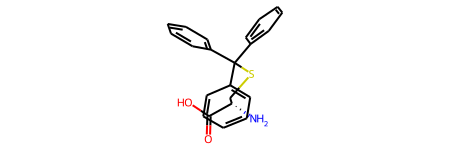

In [20]:
pdb_folder = pdb_rev_dict[ligand_name+'.sdf']
ref_file = os.path.join(raw_data_path, pdb_folder, ligand_name+'.sdf')
ref_m = Chem.MolFromMolFile(ref_file)
ref_m

In [21]:
ref_m.GetNumConformers()

1

In [22]:
conf = ref_m.GetConformer()
atom_positions = conf.GetPositions()

atom_positions

array([[ 9.4113, 39.0448, 30.7919],
       [10.0165, 40.4304, 28.7297],
       [10.757 , 41.4308, 28.0949],
       [11.7585, 42.1075, 28.7934],
       [12.0127, 41.7907, 30.1291],
       [11.2717, 40.79  , 30.7633],
       [10.2805, 40.074 , 30.0667],
       [ 9.1675, 37.8183, 29.9023],
       [10.2604, 37.1615, 29.306 ],
       [10.0714, 36.0112, 28.5357],
       [ 8.7877, 35.4911, 28.361 ],
       [ 7.6938, 36.1173, 28.9611],
       [ 7.8832, 37.2674, 29.7315],
       [ 8.1108, 39.7642, 31.1727],
       [ 7.9178, 40.32  , 32.4508],
       [ 6.7444, 41.011 , 32.7637],
       [ 5.7491, 41.1696, 31.7978],
       [ 5.9296, 40.6424, 30.518 ],
       [ 7.1033, 39.9514, 30.2065],
       [10.331 , 38.4437, 32.2909],
       [ 9.1614, 37.1188, 32.7461],
       [10.4311, 36.0038, 34.4944],
       [ 9.2555, 36.8206, 34.2309],
       [ 8.008 , 36.128 , 34.6868],
       [ 7.9674, 34.8741, 34.8058],
       [ 6.88  , 36.8793, 34.9915]])

In [23]:
# th_data = 'pharmacophore_specific_eval/3r58/4h7c_A_rec_3r58_nps_lig_tt_min_0.pt'
# th_data = os.path.join('pharmacophore_specific_eval', folder_name, ligand_name+'.pt')
th_data = os.path.join('structure_based', folder_name, ligand_name+'.pt')
data = torch.load(th_data)
data.target_pos

tensor([[ 9.4106, 39.0450, 30.8064],
        [11.0180, 41.0971, 29.4155],
        [11.0102, 41.0979, 29.4312],
        [11.0166, 41.1122, 29.4362],
        [11.0144, 41.1167, 29.4285],
        [11.0241, 41.0993, 29.4327],
        [11.0128, 41.1067, 29.4295],
        [ 9.0124, 36.6345, 29.1458],
        [ 8.9710, 36.6451, 29.1394],
        [ 8.9840, 36.6499, 29.1284],
        [ 8.9796, 36.6370, 29.1236],
        [ 8.9928, 36.6449, 29.1229],
        [ 8.9855, 36.6473, 29.1308],
        [ 6.9302, 40.4772, 31.4838],
        [ 6.9253, 40.4950, 31.4729],
        [ 6.9193, 40.4832, 31.5053],
        [ 6.9200, 40.4747, 31.4931],
        [ 6.9164, 40.4872, 31.4823],
        [ 6.9191, 40.4682, 31.4855],
        [10.3330, 38.4360, 32.3004],
        [ 8.8364, 36.6858, 33.9106],
        [10.4224, 36.0233, 34.4905],
        [ 8.8187, 36.6946, 33.8883],
        [ 8.8175, 36.6988, 33.8778],
        [ 7.9674, 34.8696, 34.8125],
        [ 6.8867, 36.8855, 34.9563],
        [ 9.4106, 39.0450, 30.8064],
 

In [24]:
center = compute_center(data['target_pos'], data['Gt_mask']).numpy()
center

array([ 8.963249, 38.642796, 31.128094], dtype=float32)

In [25]:
for i in range(ref_m.GetNumAtoms()):
    x,y,z = atom_positions[i] - center
    print(x, y, z)
    conf.SetAtomPosition(i,Point3D(x,y,z))

0.4480507934570319 0.40200443725586155 -0.3361937194824236
1.0532507934570319 1.7876044372558582 -2.3983937194824207
1.793750793457031 2.7880044372558572 -3.033193719482423
2.795250793457031 3.464704437255861 -2.3346937194824235
3.049450793457032 3.1479044372558604 -0.9989937194824208
2.3084507934570304 2.1472044372558585 -0.3647937194824209
1.3172507934570312 1.4312044372558574 -1.061393719482421
0.20425079345703168 -0.8244955627441399 -1.2257937194824216
1.2971507934570319 -1.481295562744144 -1.822093719482421
1.1081507934570318 -2.6315955627441383 -2.5923937194824234
-0.17554920654296957 -3.1516955627441376 -2.767093719482421
-1.2694492065429683 -2.5254955627441404 -2.1669937194824236
-1.0800492065429683 -1.3753955627441385 -1.3965937194824214
-0.8524492065429694 1.1214044372558618 0.04460628051757709
-1.045449206542969 1.6772044372558597 1.322706280517579
-2.218849206542969 2.368204437255862 1.6356062805175782
-3.2141492065429684 2.526804437255862 0.6697062805175769
-3.033649206542

In [26]:
# ref_m.AddConformer(conf)
for conformer in ref_m.GetConformers():
    print(conformer.GetPositions())

[[ 0.44805079  0.40200444 -0.33619372]
 [ 1.05325079  1.78760444 -2.39839372]
 [ 1.79375079  2.78800444 -3.03319372]
 [ 2.79525079  3.46470444 -2.33469372]
 [ 3.04945079  3.14790444 -0.99899372]
 [ 2.30845079  2.14720444 -0.36479372]
 [ 1.31725079  1.43120444 -1.06139372]
 [ 0.20425079 -0.82449556 -1.22579372]
 [ 1.29715079 -1.48129556 -1.82209372]
 [ 1.10815079 -2.63159556 -2.59239372]
 [-0.17554921 -3.15169556 -2.76709372]
 [-1.26944921 -2.52549556 -2.16699372]
 [-1.08004921 -1.37539556 -1.39659372]
 [-0.85244921  1.12140444  0.04460628]
 [-1.04544921  1.67720444  1.32270628]
 [-2.21884921  2.36820444  1.63560628]
 [-3.21414921  2.52680444  0.66970628]
 [-3.03364921  1.99960444 -0.61009372]
 [-1.85994921  1.30860444 -0.92159372]
 [ 1.36775079 -0.19909556  1.16280628]
 [ 0.19815079 -1.52399556  1.61800628]
 [ 1.46785079 -2.63899556  3.36630628]
 [ 0.29225079 -1.82219556  3.10280628]
 [-0.95524921 -2.51479556  3.55870628]
 [-0.99584921 -3.76869556  3.67770628]
 [-2.08324921 -1.76349556

In [27]:
ref_m.GetNumConformers()

1

In [28]:
# with Chem.SDWriter(os.path.join('pharmacophore_specific_eval', folder_name, ligand_name+'.sdf')) as w:
#     w.write(ref_m)

with Chem.SDWriter(os.path.join('structure_based', folder_name, ligand_name+'.sdf')) as w:
    w.write(ref_m)